<a href="https://colab.research.google.com/github/NamTran123/tick_toe_tiny_model/blob/master/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle

import numpy as np

In [ ]:
def pre_process(DATA_DIR):
    imgs = []
    labels = []
    list_dir = os.listdir(DATA_DIR)
    for folder in list_dir:
        list_items = os.listdir(DATA_DIR+folder)
        for item in list_items:
            img = cv2.imread(DATA_DIR+folder+"/"+item,0)
            img = img/255.0
            img = cv2.resize(img,(32,32))
            imgs.append(img)
            labels.append(folder.lower())
    return imgs, labels

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(2,activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [ ]:
imgs, labels = pre_process("/content/data/")
le = preprocessing.LabelEncoder()
imgs = np.asarray(imgs)
labels = np.asarray(labels)
print(labels)
le.fit(labels)
labels_new = le.transform(labels) 
print(labels_new)
imgs = imgs[:,:,:,np.newaxis]
imgs, labels_new = shuffle(imgs, labels_new)

X_train, X_test, y_train, y_test = train_test_split(imgs, labels_new, test_size=0.2,shuffle=True)

['tick' 'tick' 'tick' ... 'toe' 'toe' 'toe']
[0 0 0 ... 1 1 1]


In [ ]:
print(len(X_train))

1332


In [ ]:
history = model.fit(X_train, y_train, epochs=40, 
                    validation_data=(X_test, y_test))

Epoch 1/40
42/42 [==============================] - 2s 45ms/step - loss: 0.4117 - accuracy: 0.9520 - val_loss: 0.3266 - val_accuracy: 0.9880
Epoch 2/40
42/42 [==============================] - 2s 45ms/step - loss: 0.3291 - accuracy: 0.9842 - val_loss: 0.3379 - val_accuracy: 0.9760
Epoch 3/40
42/42 [==============================] - 2s 45ms/step - loss: 0.3409 - accuracy: 0.9707 - val_loss: 0.3298 - val_accuracy: 0.9820
Epoch 4/40
42/42 [==============================] - 2s 49ms/step - loss: 0.3242 - accuracy: 0.9895 - val_loss: 0.3357 - val_accuracy: 0.9760
Epoch 5/40
42/42 [==============================] - 2s 43ms/step - loss: 0.3220 - accuracy: 0.9910 - val_loss: 0.3306 - val_accuracy: 0.9820
Epoch 6/40
42/42 [==============================] - 2s 44ms/step - loss: 0.3253 - accuracy: 0.9872 - val_loss: 0.3298 - val_accuracy: 0.9820
Epoch 7/40
42/42 [==============================] - 2s 44ms/step - loss: 0.3199 - accuracy: 0.9940 - val_loss: 0.3266 - val_accuracy: 0.9880
Epoch 8/40
42

11/11 - 0s - loss: 0.3292 - accuracy: 0.9850


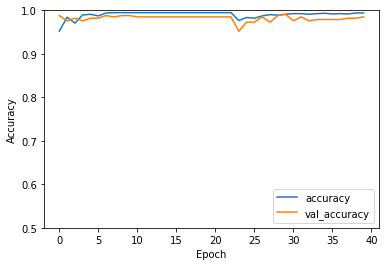

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)


In [ ]:
img = cv2.imread("/content/data/tik/[0.15174981].png",0)
img = img/255.0
img = cv2.resize(img,(32,32))
img = img[:,:,np.newaxis]
imgs_test = []
imgs_test.append(img)
imgs_test = np.asarray(imgs_test)

label = model.predict(imgs_test)
print(max(label[0]))
print(np.argmax(label[0]))

le.inverse_transform([np.argmax(label[0])])

1.0
0


array(['tik'], dtype='<U3')

In [ ]:
le.inverse_transform([np.argmax(label[0])])

array(['l'], dtype='<U1')

In [ ]:
model.save_weights(
    "/content/model.h5", overwrite=True, save_format=None
)

In [ ]:
model.load_weights("/content/model.h5")